# Discord Chat Text Analysis

Analysing the Discord Chat, "66DaysOfData". Channels:#progress and #general

## Importing libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import spacy

from spacy.matcher import PhraseMatcher
from spacy import displacy

spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm", disable=['ner'])

import json
import os

%matplotlib inline

In [2]:
os.listdir()

['.env',
 '.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '66DaysofData - important - general [749395801482199107].json',
 '66DaysofData - important - introductions [749414833275011074].json',
 '66DaysofData - important - progress [749516705734197258].json',
 'discordBotcode.py',
 'progressDiscordChatAnalysis.ipynb',
 'README.md',
 'test.py']

## Loading Data

Loading data into dataframes using `.json_normalize()`. I find the `.json` files have more infomation that the `.csv` files.

In [3]:
filename_gen = '66DaysofData - important - general [749395801482199107].json'   # 21-09-2020 NZT #general channel chat
filename_prog = '66DaysofData - important - progress [749516705734197258].json' # 21-09-2020 NZT #progress channel chat
filename_intro = '66DaysofData - important - introductions [749414833275011074].json' # 21-09-2020 NZT #introductions channel chat

def load_json_to_df(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return pd.json_normalize(data, record_path='messages')

df_gen = load_json_to_df(filename_gen)
df_prog = load_json_to_df(filename_prog)
df_intro = load_json_to_df(filename_intro)

## Exploratory Data Analysis - #progress channel

In [4]:
df_prog.shape

(1741, 15)

In [5]:
df_prog.head()

,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,attachments,embeds,reactions,author.id,author.name,author.discriminator,author.isBot,author.avatarUrl
0,749937010868748351,Default,2020-08-31T10:21:56.547+00:00,None,None,False,Day1: Created a GitHub repo. Created an R and ...,[],[],"[{'emoji': {'id': None, 'name': '💯', 'isAnimat...",715593892438736898,William Guesdon,3961,False,https://cdn.discordapp.com/embed/avatars/1.png
1,750045262277378089,Default,2020-08-31T17:32:05.694+00:00,None,None,False,> Day1: Created a GitHub repo. Created an R an...,[],[],"[{'emoji': {'id': None, 'name': '👍', 'isAnimat...",743513993250996376,Andrew from DataLeap,8501,False,https://cdn.discordapp.com/avatars/74351399325...
2,750067004639281224,Default,2020-08-31T18:58:29.477+00:00,None,None,False,Thank you @Andrew from DataLeap It can definit...,[],[],[],715593892438736898,William Guesdon,3961,False,https://cdn.discordapp.com/embed/avatars/1.png
3,750068015126544485,Default,2020-08-31T19:02:30.396+00:00,None,None,False,"Guys i am a beginner , would appreciate if you...",[],[],[],750065427107020843,vc,3696,False,https://cdn.discordapp.com/embed/avatars/1.png
4,750070203576221857,Default,2020-08-31T19:11:12.163+00:00,None,None,False,"Hi Guys, Started with basic Stat",[],[],[],750069445883461713,Arth,1001,False,https://cdn.discordapp.com/embed/avatars/1.png


In [6]:
df_prog.dtypes

id                      object
type                    object
timestamp               object
timestampEdited         object
callEndedTimestamp      object
isPinned                  bool
content                 object
attachments             object
embeds                  object
reactions               object
author.id               object
author.name             object
author.discriminator    object
author.isBot              bool
author.avatarUrl        object
dtype: object

In [7]:
# Top 10 authors for fun
top10 = df_prog[df_prog['author.isBot']==False]['author.name'].value_counts().head(10)
top10

dsgeek101           47
Ashley.bee          32
Wilson              25
Niven               25
Aaron Petry         25
15Daniel            25
RLChibi             24
nedal               23
_dominiquejames_    22
Saurabh_Joshi       21
Name: author.name, dtype: int64

C:\Users\Shiva\miniconda3\envs\shivan_environment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


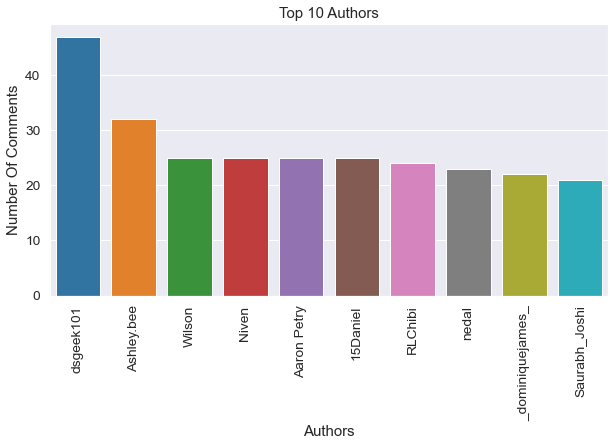

In [8]:
# and graphed... for fun

sns.set_style(style='darkgrid')
sns.set_context('notebook', font_scale=1.25, rc={'lines.linewidth': 2.5})

plt.figure(figsize=(10,5))

ax = sns.barplot(top10.index, top10.values)

labels = ax.set(title='Top 10 Authors',xlabel='Authors', ylabel='Number Of Comments')
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=90) # if not assigned to a variable, then prints lots of text

Here we do not want any content from the bot. This gives us random content to look peruse.

In [9]:
content = [_.lower() for _ in df_prog[df_prog['author.isBot']==False]['content']]

import random

random.choices(content, k=30)

['@younes not exactly a beginner. i had a course on neural networks at college and did my final year project on deepfake detection. so basically i have worked alot on cnn, autoencoders, gans, transfer learning. now i am working other things like eda, object detection algorithms, different ml models and then will proceed to nlp.',
 'today i am working traffic fatalities data set on kaggle. i try to understand data and do classification model',
 'day 1: i studied some basic sql',
 'day 2: introduction to relational databases in sql | datacamp.com 👺',
 "day 2 completed and completed module 1 of data analytics course from shaw academy. will start the book 'ultralearning ' from next week.",
 'day 17 - covered half of week 4 material for python for data science (ucsandiegox)',
 "day2 & 3/66: we went through all python basics and next week we'll gonna start with our first personal data science project",
 'day 10:\n\ngetting more familiar with my environments. using anaconda and exploring the 

## Lemmaizing, removing stops words and analysing

In [10]:
# some examples to pick
text1 = 'day 14: went through the first 3 lessons of the deep learning kaggle micro course'
text2 = "day 14: completed kaggle's pandas micro-course"
text3 = '''day 1:  complete the "analyzing police activity with pandas" course on datacamp.'''

#displacy.render(doc, jupyter=True)

for i in random.sample(list(range(len(content))), k=10):
    doc = nlp(content[i])
    noun_list = [token.lemma_ for token in doc if
                not token.is_stop and
                token.pos_ != 'PUNCT']
    output = ' '.join(noun_list)
    print(output)

day 8 progress pandas kaggle course
> day 7 # 66daysofdata 
 > 
 > today 
 > -kaggle pandas micro course review 
 -continuation kaggle seaborn datum visualization course 
 >  
 > stream twitch data viz kaggle course 
 > 
 > divert ds course udemy focus panda seaborn day certain task day job benefit pandas seaborn application 
 > 
 > want focus learn implement ml algorithm time pass clearly evident day job benefit datum analyst skill 
 @ja hi guy reply message update 

 mention stream twitch yesterday complete lesson 4 data viz kaggle course try streaming yesterday attempt awesome get 2 viewer 1 watch ipad determine haha set stream way make accountable experiment know stream rarely speak open webcam stay poorly light section house think capable explain / teach want listen chill beat c / o pretzel.rock watch slowly 😂   kaggle course learn general maybe want correct way stream 🤣   welcome 

 https://www.twitch.tv/jariuslouie 

 @andrew dataleap andrew recent video show 21 day course nice 

In [11]:
# day matcher

from spacy.matcher import Matcher

pattern_day = [{'LOWER': 'day'},
              {'LIKE_NUM': True}]

matcher = Matcher(nlp.vocab, validate=True)
matcher.add("DayMatcher", None, pattern_day)

days = []
# for i in range(len(content)):
#     doc = nlp(content[i])
#     days.extend([doc[match[1]:match[2]] for match in matcher(doc)])
# len(days)

In [12]:
df_days = pd.DataFrame(days, columns=['test','days'])
df_days['days'].value_counts() # not working, all digits are unique

Series([], Name: days, dtype: int64)

In [13]:
words = ' '.join(content)
doc = nlp(words)

simplewords = [token.lemma_ for token in doc
                            if not token.is_stop and 
                            not token.is_punct and
                            not token.lemma_ == '\n']

In [14]:
df_sw = pd.DataFrame(simplewords, columns=['word'])
df_sw.value_counts().head()

word  
day       1436
course     533
datum      415
learn      402
python     391
dtype: int64

In [23]:
def put_into_word_cloud(df):
    
    content = [_.lower() for _ in df[df['author.isBot']==False]['content']]
    
    words = ' '.join(content)
    doc = nlp(words)

    simplewords = [token.lemma_ for token in doc
                                if not token.is_stop and 
                                not token.is_punct and
                                not token.lemma_ == '\n']
    
    def plot_cloud(wordcloud):
        plt.figure(figsize=(20, 15))
        plt.imshow(wordcloud)
        plt.axis('off')
    
    from wordcloud import WordCloud, STOPWORDS

    wordcloud = WordCloud(width = 3000, height = 2000,
                          random_state=1, background_color='#3F3F3F',
                          colormap='rainbow', collocations=False,
                          stopwords = STOPWORDS).generate(' '.join(simplewords))

    plot_cloud(wordcloud)
    return

#progress


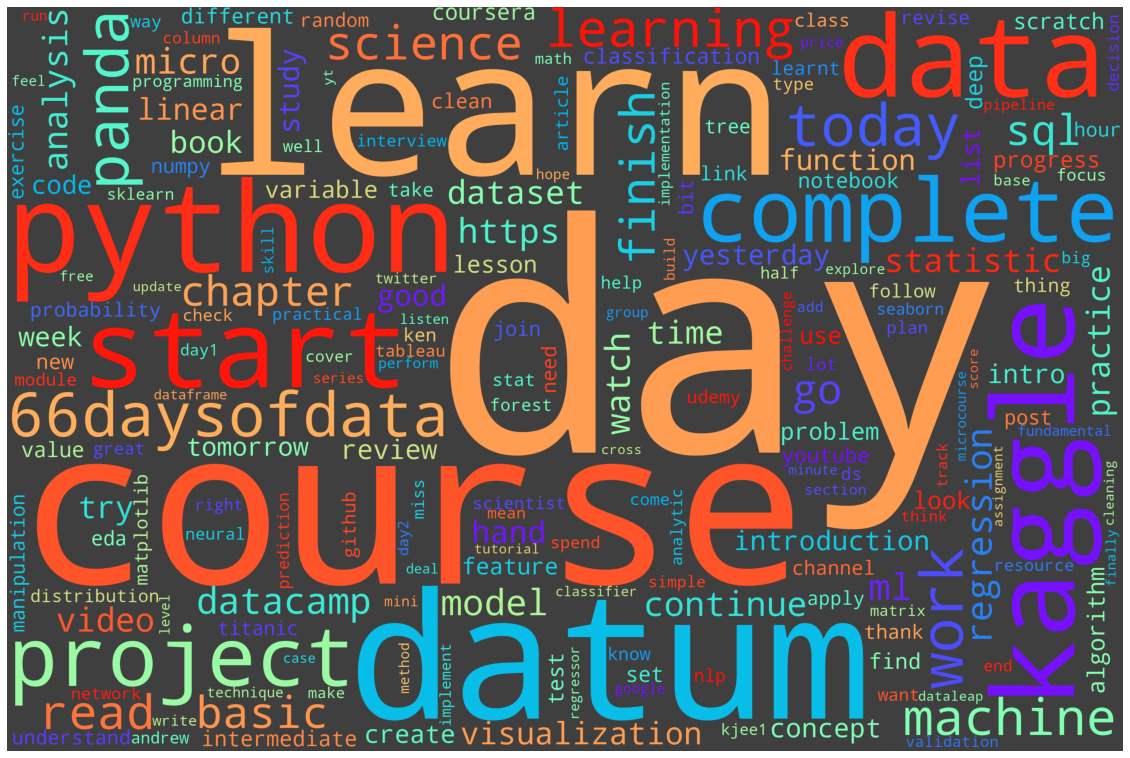

In [24]:
print('#progress')
put_into_word_cloud(df_prog)

#introduction


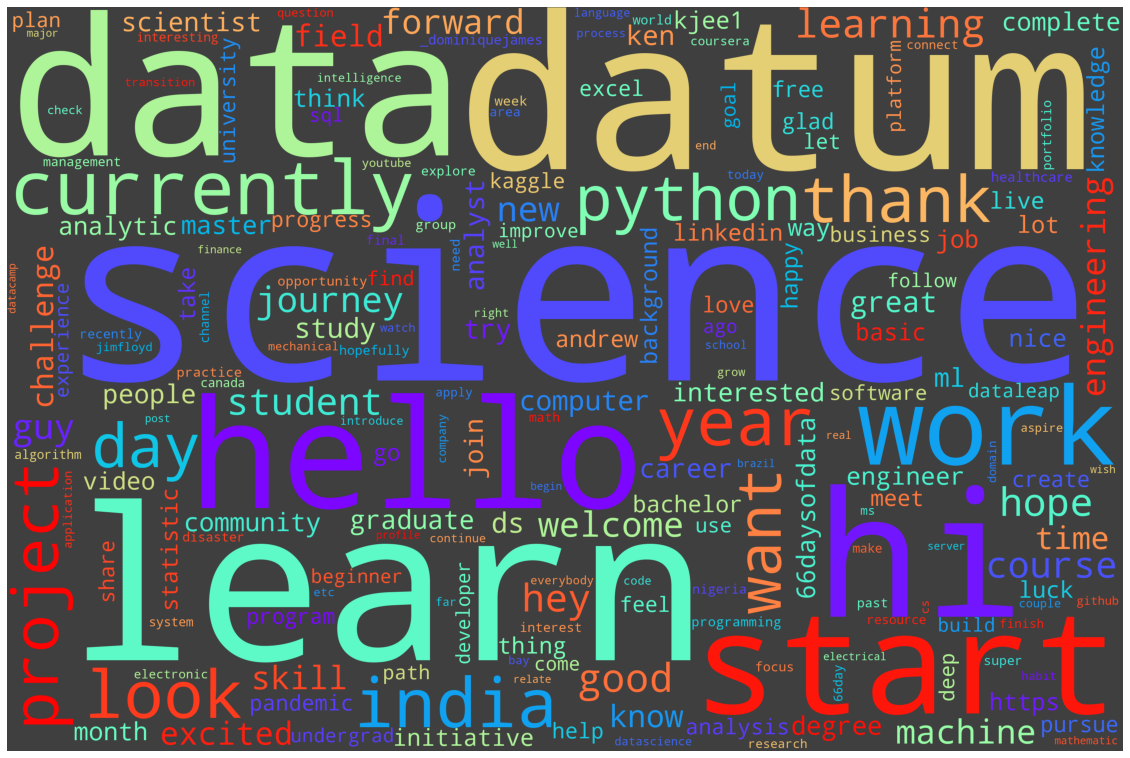

In [26]:
print('#introduction')
put_into_word_cloud(df_intro)

#general


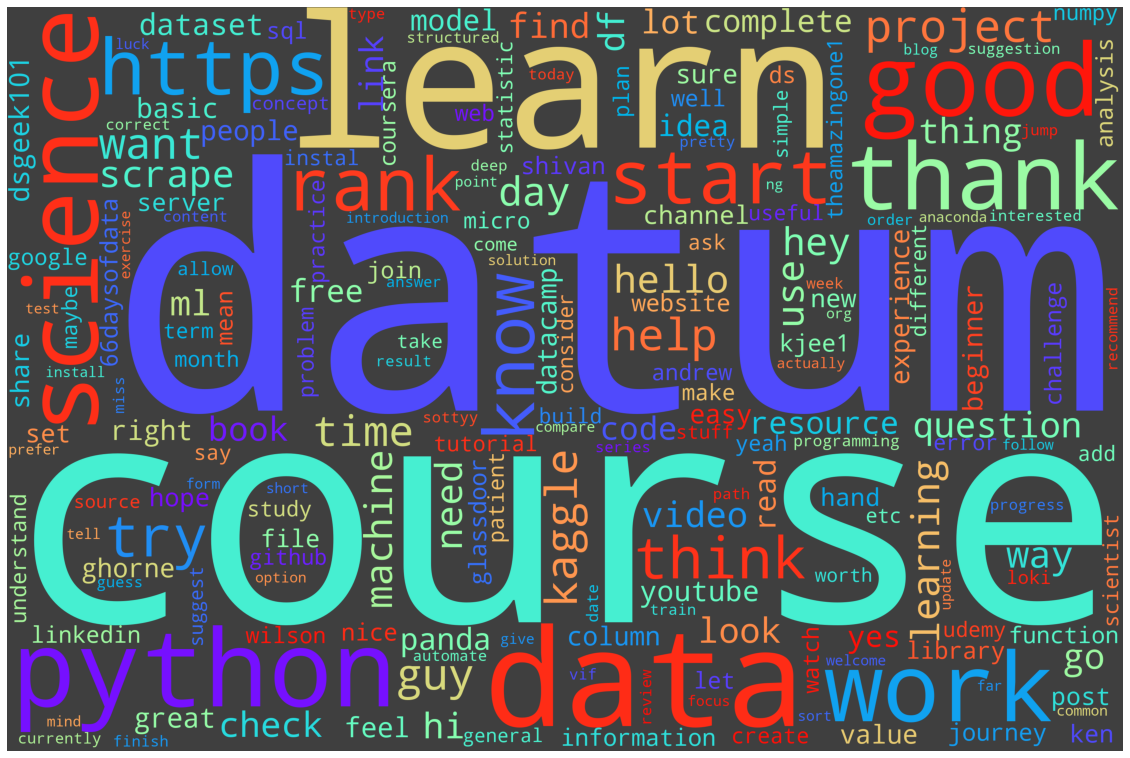

In [27]:
print('#general')
put_into_word_cloud(df_gen)

## Exploratory Data Analysis - #introductions channel

Find locations and what people do, maybe age as well. Build demographics of the audience

In [17]:
df_intro.shape

(606, 15)

In [18]:
content_intro = [_ for _ in df_intro[df_intro['author.isBot']==False]['content']]

import random

random.choices(content_intro, k=10)

['@MegalaR sure!!!',
 'Awesome thank you. Saved me some time down the line :)',
 'Hello*',
 "Hey guys! So happy to see there's a Discord now.\nI'm a psychology graduate working in care, but I'm unhappy with my job and hope to pursue a role in data science. Started learning Python a few months ago at the start of lockdown, and I've spent the last month studying data science specifically. Excited to get to know you all!",
 'Thanx!!!',
 'Greetings dear data science enthusiasts\n\nMy name is S Sai Prakash aka Ssp. I am from India.Currently working in Mechanical CAE domain. I know Telugu, Tamil, Kannada, Hindi etc., languages\n\nHappy to be part of #66DaysofData\n\nHope to learn and share with you all #BeingDataScienceAspirant',
 "Hello everyone, I'm Nedal. Just graduated in mech engr and now interested in data science",
 '@msanbur Great to have diversity in our student majors, there are tons of synergies in mechanical engineering. Keep us posted!',
 'I also have one on 3 beginner data scie

In [19]:
df.

SyntaxError: invalid syntax (<ipython-input-19-38e9e33c87a8>, line 1)